In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

https://facebook.github.io/prophet/docs/quick_start.html

In [6]:
rides = pd.read_csv("rides_weather_hoildays_all_ops.csv")
rides.head()

,Unnamed: 0,date,year,month,day,month_year,dow,year.1,weekend_flag,yesterday,...,Labor Day,Columbus Day,Veterans Day,Thanksgiving Day,Christmas Day,Christmas Eve,New Years Eve,PRCP,TMAX,TMIN
0,0,2014-01-21,2014,1,21,12014,2,2014,False,2014-01-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,49.0
1,1,2014-01-22,2014,1,22,12014,3,2014,False,2014-01-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,48.0
2,2,2014-01-23,2014,1,23,12014,4,2014,False,2014-01-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,48.0
3,3,2014-01-24,2014,1,24,12014,5,2014,False,2014-01-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,49.0
4,4,2014-01-25,2014,1,25,12014,6,2014,True,2014-01-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,50.0


In [7]:
# the historic df will be for years 2014 - 2017. The aim will be to predict 2018
df = rides[rides.year!= 2018][['date', 'swipes']]
df.columns = ['ds', 'y']
df.head(10)

,ds,y
0,2014-01-21,610287
1,2014-01-22,750258
2,2014-01-23,744432
3,2014-01-24,731204
4,2014-01-25,493683
5,2014-01-26,314091
6,2014-01-27,553294
7,2014-01-28,741857
8,2014-01-29,754586
9,2014-01-30,737107


In [8]:
df_2018 = rides[rides.year == 2018][['date', 'swipes']]
df_2018.columns = ['ds', 'y']

In [9]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1801,2018-12-27
1802,2018-12-28
1803,2018-12-29
1804,2018-12-30
1805,2018-12-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1801,2018-12-27,594641.006583,506118.402897,680015.436077
1802,2018-12-28,554522.335499,466789.874168,637832.103779
1803,2018-12-29,269862.421119,187521.864859,358329.515345
1804,2018-12-30,101864.618061,8545.965992,190597.863063
1805,2018-12-31,368118.015663,276784.832262,455732.864266


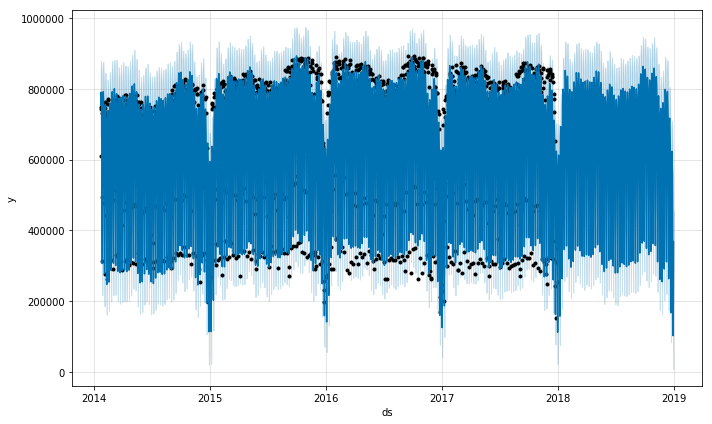

In [12]:
fig1 = m.plot(forecast)

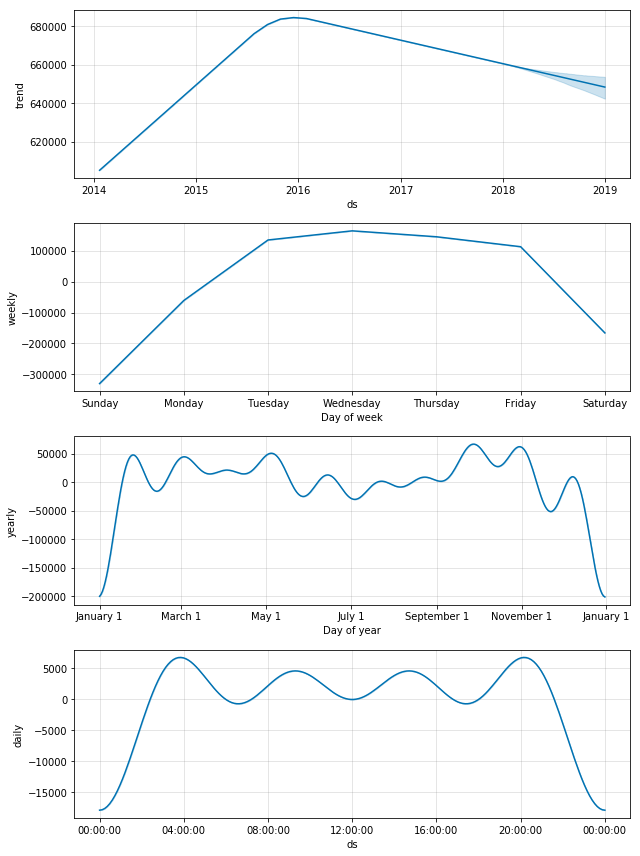

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
df.tail()

,ds,y
1436,2017-12-27,460374
1437,2017-12-28,501348
1438,2017-12-29,501799
1439,2017-12-30,349519
1440,2017-12-31,254176


In [15]:
# 'yhat', 'yhat_lower', 'yhat_upper']]
df_2018['y_hat'] = forecast['yhat']
df_2018['yhat_lower'] = forecast['yhat_lower']
df_2018['yhat_upper'] = forecast['yhat_upper']

abs_errors = abs(df_2018['y_hat'] - df_2018['y'])
sq_errors = (df_2018['y_hat'] - df_2018['y'])**2
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(abs_errors), 4))
print('RMSE :', round(np.sqrt(np.mean(sq_errors)), 4))

Mean Absolute Error: 76211.7016
RMSE : 96518.8921


In [16]:
abs_errors_percent = abs((df_2018['y_hat'] - df_2018['y'])/df_2018['y'])
print("This model's predictions is on average about ", round(np.mean(abs_errors_percent), 4), "off of the actual ridership for that day")


This model's predictions is on average about  0.129 off of the actual ridership for that day


Text(0.5, 1.0, '2018 True and Predicted Clipper Swipes')

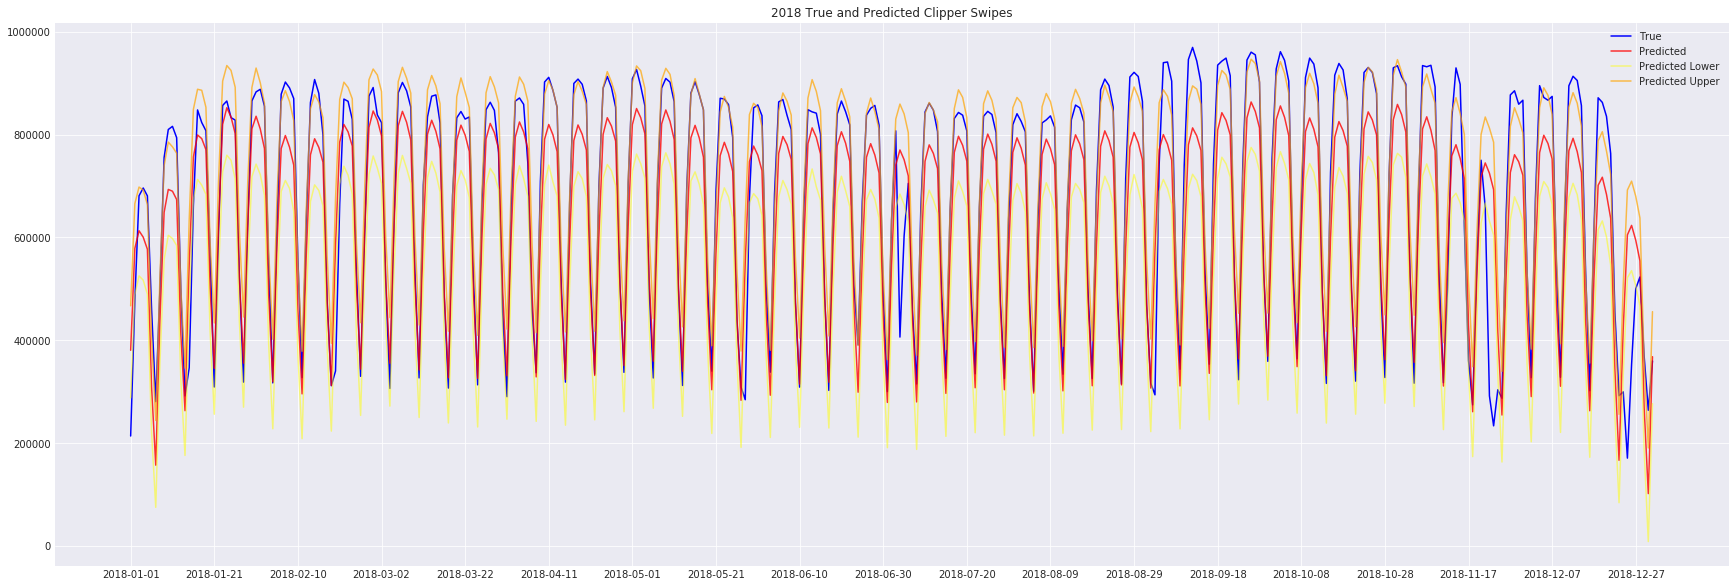

In [17]:
from matplotlib.pyplot import scatter, title
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(30, 10))

plt.plot(df_2018['ds'], df_2018['y'], marker='', color='blue',label='True')
plt.plot(df_2018['ds'], df_2018['y_hat'], marker='', color='red',label='Predicted', alpha=0.8)
plt.plot(df_2018['ds'], df_2018['yhat_lower'], marker='', color='yellow',label='Predicted Lower', alpha=0.5)
plt.plot(df_2018['ds'], df_2018['yhat_upper'], marker='', color='orange',label='Predicted Upper', alpha=0.7)

plt.legend()


ax.set_xticks(ax.get_xticks()[::20])
title("2018 True and Predicted Clipper Swipes")

In [19]:
errors_percent = (df_2018['y_hat'] - df_2018['y'])/df_2018['y']
df_2018['errors_percents'] = errors_percent
df_2018.sort_values('errors_percents')[['ds', 'errors_percents', 'y', 'y_hat']]

,ds,errors_percents,y,y_hat
1804,2018-12-30,-0.613955,263867,101864.618061
1447,2018-01-07,-0.439973,280704,157201.818799
1797,2018-12-23,-0.429936,292310,166635.502121
1446,2018-01-06,-0.329371,460838,309051.226580
1803,2018-12-29,-0.270254,369803,269862.421119
1796,2018-12-22,-0.243360,455097,344344.786907
1615,2018-06-24,-0.235225,391022,299043.732854
1693,2018-09-10,-0.214043,740523,582019.221896
1792,2018-12-18,-0.195223,871654,701486.725231
1679,2018-08-27,-0.187211,714778,580964.042235


In [21]:
np.mean(errors_percent)

-0.040078726942042744

Text(0.5, 1.0, 'Test Set Error Percentage')

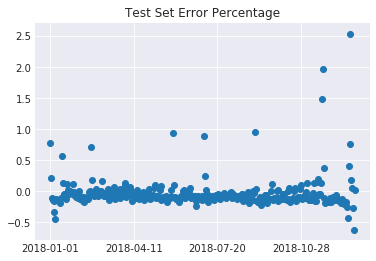

In [20]:
from matplotlib.pyplot import scatter, title
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter(df_2018['ds'], errors_percent)
ax.set_xticks(ax.get_xticks()[::100])
title("Test Set Error Percentage")